# Q1. Predicting housing prices

In this problem, you will generate models for predicting house prices from given house features. The file “house_prices.txt” contains the data.

There are four features used in this regression:

* one binary feature (whether or not the house has covered parking)
* one numerical feature (size, measure in thousands of square meters)
* two categorical features (architectural style and location)

Each of the categorial features is represented as a vector of size 3. This gives us feature vectors of size 8 in total for each house. 200 examples are given in the training set.

In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%%bash

gdown 1hLxbWVrnmSnZDGjvu8HeQex6ezbXeLB6

Couldn't find program: 'bash'


In [3]:
DATA_DIR = pathlib.Path("./datasets")

In [4]:
features = pd.read_csv(
    DATA_DIR / "house_prices.txt",
    delimiter = "\t",
    skiprows=[0, 1, 2, 3, 4],
    header=None,
    usecols=[0, 1, 2, 3, 4, 6, 7, 8],
    names=["parking", "sq_meters", "art_deco", "bungalow", "colonial", "west", "east", "north"],
    dtype=np.float32
)

target = pd.read_csv(
    DATA_DIR / "house_prices.txt",
    delimiter = "\t",
    skiprows=[0, 1, 2, 3, 4],
    header=None,
    usecols=[5],
    names=["price"],
    dtype=np.float32
)


In [5]:
features.head()

,parking,sq_meters,art_deco,bungalow,colonial,west,east,north
0,-1.0,0.1275,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.1100,1.0,0.0,0.0,1.0,0.0,0.0
2,-1.0,0.1375,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.1975,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.0,0.1200,0.0,0.0,1.0,1.0,0.0,0.0


In [6]:
target

,price
0,0.300
1,0.335
2,0.286
3,0.512
4,0.295
...,...
195,0.727
196,0.407
197,0.523
198,0.313


## a) Split the dataset into training and testing sets

Split the dataset into training and testing sets. Keep 80% of the data for training and 20% of the data for testing.

In [7]:
idx = np.arange(len(features))
np.random.shuffle(idx)

train_idx = idx[:int(0.8 * len(features))]
test_idx = idx[int(0.8 * len(features)):]

X_train, X_test = features.iloc[train_idx], features.iloc[test_idx]
y_train, y_test = target.iloc[train_idx], target.iloc[test_idx]

## b) Build a neural network to predict house prices

Use the provided dataloaders, define a neural network with two hidden layers of 10 units each both with ReLU activation. The output unit should have no activation function.

In [8]:
import torch
from torch import nn, optim, utils

In [9]:
train_features_tensor = torch.from_numpy(X_train.values)
train_target_tensor = torch.from_numpy(y_train.values)

train_dataset = utils.data.TensorDataset(
    train_features_tensor,
    train_target_tensor
)

test_features_tensor = torch.from_numpy(X_test.values)
test_target_tensor = torch.from_numpy(y_test.values)

test_dataset = utils.data.TensorDataset(
    test_features_tensor,
    test_target_tensor
)

train_dataloader = utils.data.DataLoader(
    train_dataset,
    batch_size=40,
    shuffle=True
)

test_dataloader = utils.data.DataLoader(
    test_dataset,
    batch_size=40,
    shuffle=False
)

Define a neural network with two hidden layers of 10 units each both with ReLU activation. The output unit should have no activation function.

In [10]:
class NN1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

## c) Train your neural network using gradient descent

Using mean square loss, train the network with an appropriate optimizer for a few hundred epochs and plot the loss versus the number of training epochs.

In [11]:
lr = 1e-2
num_epochs = 500

# Initialize the network
net = NN1()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=lr)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

In [12]:
# Training function
def train_epoch():
    net.train()
    running_loss = 0.0
    for i, data in enumerate(train_dataloader):
        inputs, y = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'[{i+1}/{len(train_dataloader)}] loss: {running_loss/100:.4f}')
            running_loss = 0.0
    return running_loss / len(train_dataloader)

In [13]:
# Test function
def test():
    net.eval()
    error = 0.0
    with torch.no_grad():
        for data in test_dataloader:
            inputs, y = data
            outputs = net(inputs)
            error += criterion(outputs, y).item()

    print(f'Test error: {error/len(test_dataloader):.4f}')
    return error / len(test_dataloader)

Epoch [1/500]
Test error: 0.1253
Epoch [2/500]
Test error: 0.0408
Epoch [3/500]
Test error: 0.0212
Epoch [4/500]
Test error: 0.0218
Epoch [5/500]
Test error: 0.0212
Epoch [6/500]
Test error: 0.0201
Epoch [7/500]
Test error: 0.0200
Epoch [8/500]
Test error: 0.0199
Epoch [9/500]
Test error: 0.0198
Epoch [10/500]
Test error: 0.0197
Epoch [11/500]
Test error: 0.0197
Epoch [12/500]
Test error: 0.0197
Epoch [13/500]
Test error: 0.0197
Epoch [14/500]
Test error: 0.0197
Epoch [15/500]
Test error: 0.0197
Epoch [16/500]
Test error: 0.0197
Epoch [17/500]
Test error: 0.0197
Epoch [18/500]
Test error: 0.0197
Epoch [19/500]
Test error: 0.0197
Epoch [20/500]
Test error: 0.0197
Epoch [21/500]
Test error: 0.0197
Epoch [22/500]
Test error: 0.0197
Epoch [23/500]
Test error: 0.0197
Epoch [24/500]
Test error: 0.0197
Epoch [25/500]
Test error: 0.0197
Epoch [26/500]
Test error: 0.0197
Epoch [27/500]
Test error: 0.0197
Epoch [28/500]
Test error: 0.0197
Epoch [29/500]
Test error: 0.0197
Epoch [30/500]
Test err

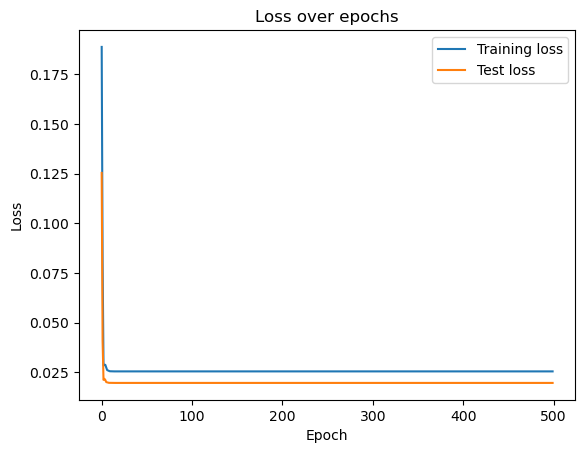

In [14]:
# Training loop
train_losses = []
test_losses = []
for epoch in range(num_epochs):
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    train_loss = train_epoch()
    train_losses.append(train_loss)
    test_accuracy = test()
    test_losses.append(test_accuracy)
    scheduler.step()  # Step the learning rate scheduler

print('Training finished')

# Plot the loss over epochs
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()


## d) Assess the performance of your neural network

Assess the performance of your neural network on the training data and the testing data. Comment on the results.

I plot the the changes of training loss and test loss over epochs. The training loss decreases over epochs. Both loss decrease over epochs. The test loss is higher than the training loss. The model is a little bit overfitting.
But I don't observe the phenomenon that the test loss increases after a few epochs. I think it is because the model is not complex enough.
Sometimes two loss can be very close, but testing loss always higher than training loss. Yhe difference may be caused by the randomness of initialization.

# Q2. Classification

Consider the following simulated classification dataset with N = 300 samples labeled with one of three class labels.

In [15]:
%%bash

gdown 1_n5odu1KSpBAqO_Ddbqy2Ty0mG12Dr0A
gdown 1C7GK_uY0srlUdLfHfGa4IZcfthmmdROr

Couldn't find program: 'bash'


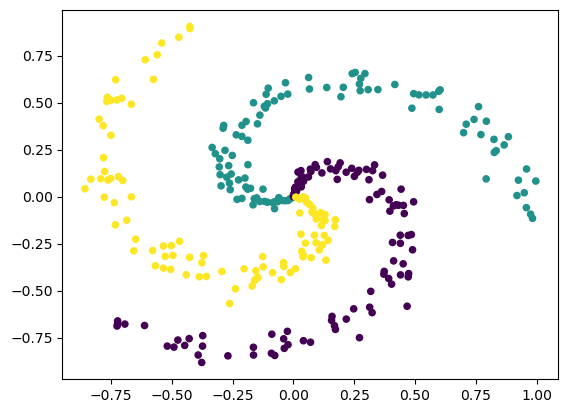

In [16]:
features = (np.load(DATA_DIR / "spiral_features.npy")
              .astype(np.float32))
target = np.load(DATA_DIR / "spiral_target.npy")

# visualize the data
plt.scatter(features[:, 0], features[:, 1], c=target, s=20)
plt.show()

## a) Split the dataset into training and testing sets

Split the dataset into training and testing sets. Keep 80% of the data for training and 20% of the data for testing.

In [17]:
idx = np.arange(len(features))
np.random.shuffle(idx)
train_idx = idx[:int(0.8*len(features))]
test_idx = idx[int(0.8*len(features)):]

X_train = features[train_idx]
y_train = target[train_idx]
X_test = features[test_idx]
y_test = target[test_idx]

## b) Train a logistic regression model

Using the provided datasets and dataloaders, build a 3-class logistic regression classifier for this dataset using PyTorch and train it for 2000 epochs using gradient descent.

In [18]:
train_features_tensor = torch.from_numpy(X_train)
train_target_tensor = torch.from_numpy(y_train)

train_dataset = utils.data.TensorDataset(
    train_features_tensor,
    train_target_tensor
)

test_features_tensor = torch.from_numpy(X_test)
test_target_tensor = torch.from_numpy(y_test)

test_dataset = utils.data.TensorDataset(
    test_features_tensor,
    test_target_tensor
)

train_dataloader = utils.data.DataLoader(
    train_dataset,
    batch_size=20,
    shuffle=True
)

test_dataloader = utils.data.DataLoader(
    test_dataset,
    batch_size=20,
    shuffle=False
)

#### The Logistic Regression for multi-class classification is equivalent to the a fully connected neural network with softmax activation function.

Let's see why the two are equivalent. The logistic regression model out put a vector $z$ with three elements, and the softmax function is defined as
$$
\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^3 e^{z_j}}
$$
where $i = 1, 2, 3$. The output of the softmax function is a vector with three elements, and the sum of the elements is 1. This is exactly the same as the output of the logistic regression model. So the logistic regression model is equivalent to a fully connected neural network with softmax activation function.

In [19]:
n_class = 3
p = 2
class LogiReg(nn.Module):
    def __init__(self):
        super(LogiReg, self).__init__()
        self.linear = nn.Linear(p, n_class)

    def forward(self, x):
        return self.linear(x)

In [20]:
net = LogiReg()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1) # step_size is the number of epochs to decay the learning rate

In [21]:
# Training function
def train_epoch():
    net.train()
    running_loss = 0.0
    for i, data in enumerate(train_dataloader):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Training Batch [{i+1}/{len(train_dataloader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in train_dataloader:
            inputs, labels = data
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Test function
def test():
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_dataloader:
            inputs, labels = data
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on the test set: {accuracy:.2f}%')
    return accuracy

Epoch [1/500]
Accuracy on the test set: 26.67%
Epoch [2/500]
Accuracy on the test set: 33.33%
Epoch [3/500]
Accuracy on the test set: 36.67%
Epoch [4/500]
Accuracy on the test set: 38.33%
Epoch [5/500]
Accuracy on the test set: 45.00%
Epoch [6/500]
Accuracy on the test set: 48.33%
Epoch [7/500]
Accuracy on the test set: 53.33%
Epoch [8/500]
Accuracy on the test set: 53.33%
Epoch [9/500]
Accuracy on the test set: 50.00%
Epoch [10/500]
Accuracy on the test set: 55.00%
Epoch [11/500]
Accuracy on the test set: 55.00%
Epoch [12/500]
Accuracy on the test set: 51.67%
Epoch [13/500]
Accuracy on the test set: 51.67%
Epoch [14/500]
Accuracy on the test set: 51.67%
Epoch [15/500]
Accuracy on the test set: 51.67%
Epoch [16/500]
Accuracy on the test set: 51.67%
Epoch [17/500]
Accuracy on the test set: 51.67%
Epoch [18/500]
Accuracy on the test set: 51.67%
Epoch [19/500]
Accuracy on the test set: 51.67%
Epoch [20/500]
Accuracy on the test set: 51.67%
Epoch [21/500]
Accuracy on the test set: 51.67%
E

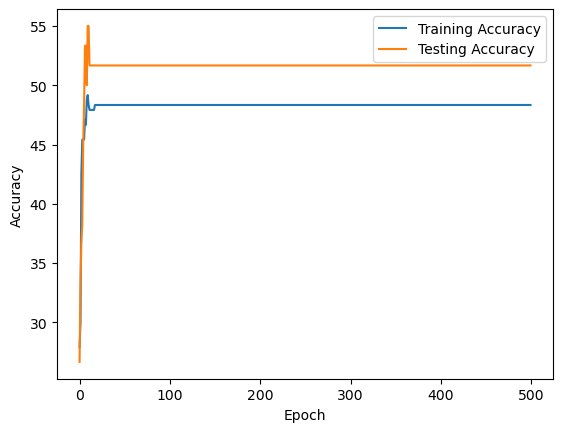

In [22]:
# Training loop
train_accs = []
test_accs = []
for epoch in range(num_epochs):
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    train_loss = train_epoch()
    train_accs.append(train_loss)
    test_accuracy = test()
    test_accs.append(test_accuracy)
    scheduler.step()  # Step the learning rate scheduler

print('Training finished')

# Plot the loss over epochs
plt.plot(train_accs, label='Training Accuracy')
plt.plot(test_accs, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## c) Assess the performance of your logistic regression model

Again, I plotted the loss over epochs. The training and testing accuracy are both around 55%, not good but better than random guess. The model is underfitting.
#### Comment
Without any feature engineering, the performance of the logistic regression model is not very good, though it is better than random guess.
This can be easily explained by the fact that the spiral dataset is not linearly separable. The logistic regression model is a linear model, so it cannot our swirl-shaped data.

## d) Build a neural network classifier

Build a 3-class classifier using a neural network with one hidden layer of 100 units and a ReLU activation. Train the network with a gradient descent algorithm and for 2000 iterations.

In [23]:
class NN_cls(nn.Module):
    def __init__(self):
        super(NN_cls, self).__init__()
        self.fc1 = nn.Linear(p, 100)
        self.fc2 = nn.Linear(100, n_class)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        x = torch.softmax(x, dim=1)
        return x

In [24]:
net = NN_cls()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
Scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
# constant learning rate

In [25]:
# Training function
def train_epoch():
    net.train()
    running_loss = 0.0
    for i, data in enumerate(train_dataloader):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Training Batch [{i+1}/{len(train_dataloader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in train_dataloader:
            inputs, labels = data
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Test function
def test():
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_dataloader:
            inputs, labels = data
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on the test set: {accuracy:.2f}%')
    return accuracy

Epoch [1/500]
Accuracy on the test set: 61.67%
Epoch [2/500]
Accuracy on the test set: 53.33%
Epoch [3/500]
Accuracy on the test set: 55.00%
Epoch [4/500]
Accuracy on the test set: 55.00%
Epoch [5/500]
Accuracy on the test set: 55.00%
Epoch [6/500]
Accuracy on the test set: 55.00%
Epoch [7/500]
Accuracy on the test set: 55.00%
Epoch [8/500]
Accuracy on the test set: 55.00%
Epoch [9/500]
Accuracy on the test set: 55.00%
Epoch [10/500]
Accuracy on the test set: 55.00%
Epoch [11/500]
Accuracy on the test set: 56.67%
Epoch [12/500]
Accuracy on the test set: 53.33%
Epoch [13/500]
Accuracy on the test set: 50.00%
Epoch [14/500]
Accuracy on the test set: 50.00%
Epoch [15/500]
Accuracy on the test set: 51.67%
Epoch [16/500]
Accuracy on the test set: 50.00%
Epoch [17/500]
Accuracy on the test set: 50.00%
Epoch [18/500]
Accuracy on the test set: 50.00%
Epoch [19/500]
Accuracy on the test set: 51.67%
Epoch [20/500]
Accuracy on the test set: 50.00%
Epoch [21/500]
Accuracy on the test set: 50.00%
E

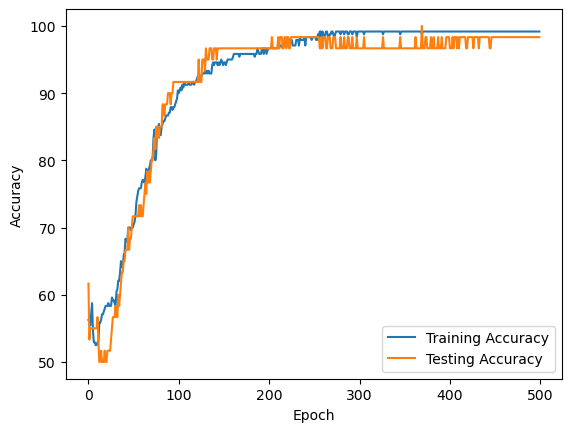

In [26]:
# Training loop
train_accs = []
test_accs = []
for epoch in range(num_epochs):
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    train_loss = train_epoch()
    train_accs.append(train_loss)
    test_accuracy = test()
    test_accs.append(test_accuracy)
    scheduler.step()  # Step the learning rate scheduler

print('Training finished')

# Plot the loss over epochs
plt.plot(train_accs, label='Training Accuracy')
plt.plot(test_accs, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


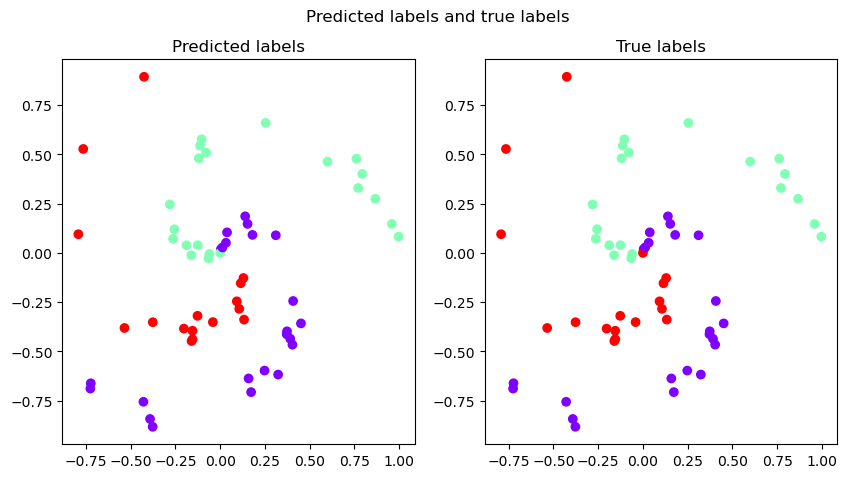

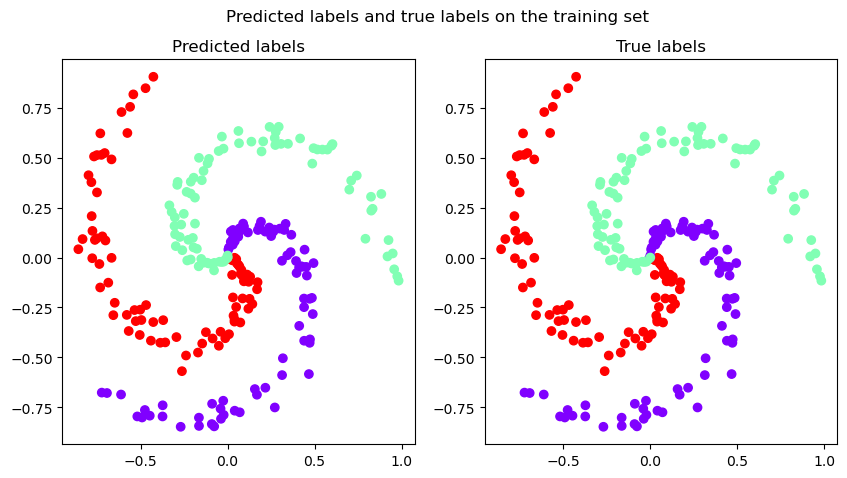

In [27]:
# Plot the predited labels and the true labels
net.eval()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Predicted labels and true labels')
with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        plt.subplot(1, 2, 1)
        plt.scatter(inputs[:, 0], inputs[:, 1], c=predicted, cmap='rainbow')
        plt.title('Predicted labels')
        plt.subplot(1, 2, 2)
        plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, cmap='rainbow')
        plt.title('True labels')
plt.show()

net.eval()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Predicted labels and true labels on the training set')
with torch.no_grad():
    for data in train_dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        plt.subplot(1, 2, 1)
        plt.scatter(inputs[:, 0], inputs[:, 1], c=predicted, cmap='rainbow')
        plt.title('Predicted labels')
        plt.subplot(1, 2, 2)
        plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, cmap='rainbow')
        plt.title('True labels')
plt.show()


## e) Assess the performance of your neural network

Assess the performance of your neural network on the training data and the testing data in terms of both loss and accuracy. Comment on the results.

The above four figures show the predicted labels and the true labels on the training set and the test set. The neural network classifier has achieved a very high accuracy on the training set, as well as the test set.

The testing accuracy is slightly lower than the training accuracy, however, this may be due to the testing size and randomness(sometimes got 100% on test set). It does not look very likely that the model is overfitting.

## f) Interpret the confusion matrix

Compute the confusion matrix for your classifier on both the training and testing data and interpret the results. You may either code your own confusion matrix or use the following function from Scikit-Learn.

In [28]:
from sklearn import metrics

In [29]:
y_pred = []
y_true = []
with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.append(predicted)
        y_true.append(labels)

y_pred = torch.cat(y_pred)
y_true = torch.cat(y_true)
# to numpy
y_pred = y_pred.numpy()
y_true = y_true.numpy()

In [30]:
cm1 = metrics.confusion_matrix(y_true, y_pred)
print(cm1)

[[23  0  0]
 [ 0 20  0]
 [ 0  1 16]]


#### Comment
The confusion matrix shows how well our model classifies each class. The diagonal elements are the number of correct predictions. The off-diagonal elements are the number of incorrect predictions.
The rows means the ground truth, and the columns means the prediction.
In one output of my model, the confusion matrix is:
```
[[ 21  3  0]
 [ 0 14  1]
 [ 1  0  20]]
```
This means that the model classify class 1 and class 2 very well, but it makes some mistakes in class 0. It misclassifies 3 class 0 data as class 1.

Additionally, I found that the testing set is imbalance. I think it ought to be balanced to work out a fair confusion matrix.

## g) Create your own deep neural network!

Create your own deep neural network and try to get as high an accuracy score on the test set as possible. Be creative: this is an opportunity for you to demonstrate what you can do!

In [31]:
# create a 2-layer neural network, each layer has 50 neurons
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(2, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # no activation function for the last layer
        return x

In [32]:
net = MyNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
Scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
# constant learning rate

In [33]:
# Training function
def train_epoch():
    net.train()
    running_loss = 0.0
    for i, data in enumerate(train_dataloader):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Training Batch [{i+1}/{len(train_dataloader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in train_dataloader:
            inputs, labels = data
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Test function
def test():
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_dataloader:
            inputs, labels = data
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on the test set: {accuracy:.2f}%')
    return accuracy

Epoch [1/500]
Accuracy on the test set: 60.00%
Epoch [2/500]
Accuracy on the test set: 58.33%
Epoch [3/500]
Accuracy on the test set: 53.33%
Epoch [4/500]
Accuracy on the test set: 58.33%
Epoch [5/500]
Accuracy on the test set: 55.00%
Epoch [6/500]
Accuracy on the test set: 55.00%
Epoch [7/500]
Accuracy on the test set: 55.00%
Epoch [8/500]
Accuracy on the test set: 53.33%
Epoch [9/500]
Accuracy on the test set: 56.67%
Epoch [10/500]
Accuracy on the test set: 58.33%
Epoch [11/500]
Accuracy on the test set: 55.00%
Epoch [12/500]
Accuracy on the test set: 60.00%
Epoch [13/500]
Accuracy on the test set: 61.67%
Epoch [14/500]
Accuracy on the test set: 61.67%
Epoch [15/500]
Accuracy on the test set: 61.67%
Epoch [16/500]
Accuracy on the test set: 63.33%
Epoch [17/500]
Accuracy on the test set: 65.00%
Epoch [18/500]
Accuracy on the test set: 65.00%
Epoch [19/500]
Accuracy on the test set: 70.00%
Epoch [20/500]
Accuracy on the test set: 70.00%
Epoch [21/500]
Accuracy on the test set: 73.33%
E

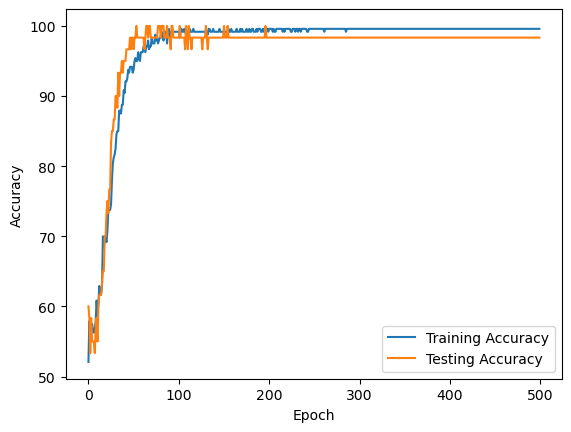

In [34]:
# Training loop
train_accs = []
test_accs = []
for epoch in range(num_epochs):
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    train_loss = train_epoch()
    train_accs.append(train_loss)
    test_accuracy = test()
    test_accs.append(test_accuracy)
    scheduler.step()  # Step the learning rate scheduler

print('Training finished')

# Plot the loss over epochs
plt.plot(train_accs, label='Training Accuracy')
plt.plot(test_accs, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


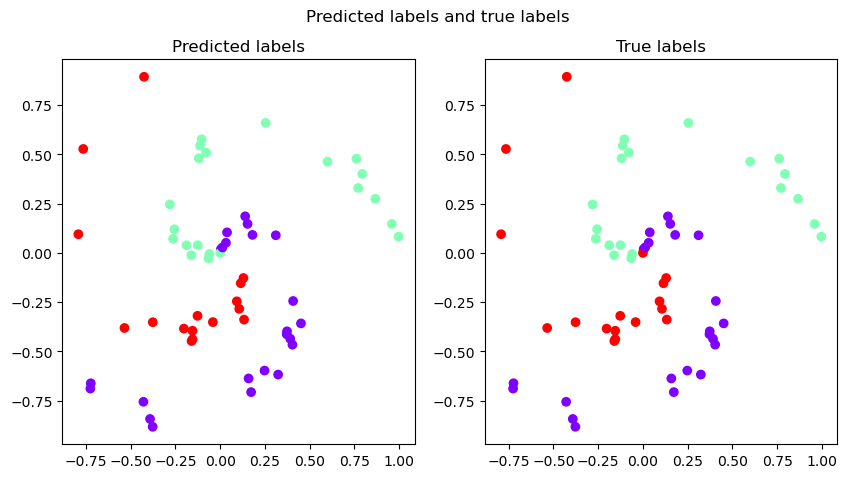

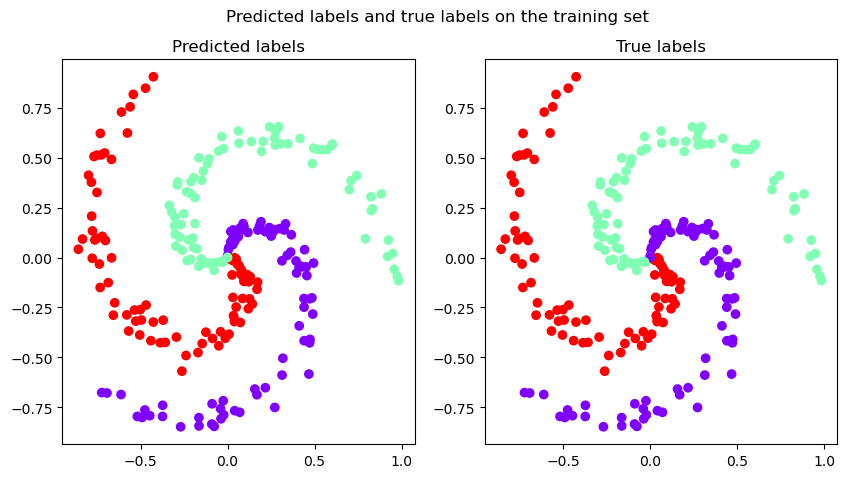

In [35]:
# Plot the predited labels and the true labels
net.eval()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Predicted labels and true labels')
with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        plt.subplot(1, 2, 1)
        plt.scatter(inputs[:, 0], inputs[:, 1], c=predicted, cmap='rainbow')
        plt.title('Predicted labels')
        plt.subplot(1, 2, 2)
        plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, cmap='rainbow')
        plt.title('True labels')
plt.show()

net.eval()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Predicted labels and true labels on the training set')
with torch.no_grad():
    for data in train_dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        plt.subplot(1, 2, 1)
        plt.scatter(inputs[:, 0], inputs[:, 1], c=predicted, cmap='rainbow')
        plt.title('Predicted labels')
        plt.subplot(1, 2, 2)
        plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, cmap='rainbow')
        plt.title('True labels')
plt.show()


In [36]:
# Confusion matrix
y_pred = []
y_true = []
with torch.no_grad():
    for data in test_dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.append(predicted)
        y_true.append(labels)
y_pred = torch.cat(y_pred, dim=0)
y_true = torch.cat(y_true, dim=0)
print(metrics.confusion_matrix(y_true, y_pred))


[[23  0  0]
 [ 0 20  0]
 [ 0  1 16]]


## Evaluate the classification prediction using other criteria

In [37]:
accuracy = metrics.accuracy_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred, average='macro')  # 宏平均
recall = metrics.recall_score(y_true, y_pred, average='macro')  # 宏平均
f1 = metrics.f1_score(y_true, y_pred, average='macro')  # 宏平均

# print criterion
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9833333333333333
Precision: 0.9841269841269842
Recall: 0.9803921568627452
F1 Score: 0.9817689085981769


#### Accuracy
$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$, it measures the proportion of correct predictions among all cases.
#### Precision
$$Precision = \frac{TP}{TP+FP}$$, it measures the proportion of correct positive predictions among all positive predictions. (true/ declared to be true)
#### Recall
$$Recall = \frac{TP}{TP+FN}$$, it measures the proportion of correct positive predictions among all positive cases. (true/ should be true)
#### F1 Score
$$F1 = \frac{2*Precision*Recall}{Precision+Recall}$$, it is the **harmonic mean** of precision and recall. It is a better measure than accuracy when the classes are imbalanced.

In multi-class classification, we can calculate the average of the criterion for each class.

But since our model is too good, the four criterion are quite similar.

The performance is close. However, my 2-layer design need less time to train and test. The accuracy on the test set is also close to the 3-layer design.

### A Model aimed at overfitting

Here I design a model with 3 hidden layers and 100 neurons in each layer.
I also add dropout layers after each hidden layer to prevent overfitting. (dropout rate = 0.2). Dropout layer is also realized in the other file by numpy.
The dropout layer will randomly set some neurons to 0 during training. This will prevent the model from overfitting. Some kind of regularization.

In [38]:
class overfittingNet(nn.Module):
    def __init__(self):
        super(overfittingNet, self).__init__()
        self.fc1 = nn.Linear(2, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 100)
        self.fc4 = nn.Linear(100, 3)
        self.dropout1 = nn.Dropout(p=0.2)
        self.dropout2 = nn.Dropout(p=0.2)
        self.dropout3 = nn.Dropout(p=0.2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        return x

In [39]:
net = overfittingNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
Scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

In [40]:
# Training function
def train_epoch():
    net.train()
    running_loss = 0.0
    for i, data in enumerate(train_dataloader):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'Training Batch [{i+1}/{len(train_dataloader)}], Loss: {running_loss/100:.4f}')
            running_loss = 0.0
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in train_dataloader:
            inputs, labels = data
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Test function
def test():
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_dataloader:
            inputs, labels = data
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on the test set: {accuracy:.2f}%')
    return accuracy

Epoch [1/500]
Accuracy on the test set: 55.00%
Epoch [2/500]
Accuracy on the test set: 61.67%
Epoch [3/500]
Accuracy on the test set: 56.67%
Epoch [4/500]
Accuracy on the test set: 51.67%
Epoch [5/500]
Accuracy on the test set: 63.33%
Epoch [6/500]
Accuracy on the test set: 66.67%
Epoch [7/500]
Accuracy on the test set: 65.00%
Epoch [8/500]
Accuracy on the test set: 63.33%
Epoch [9/500]
Accuracy on the test set: 73.33%
Epoch [10/500]
Accuracy on the test set: 71.67%
Epoch [11/500]
Accuracy on the test set: 78.33%
Epoch [12/500]
Accuracy on the test set: 81.67%
Epoch [13/500]
Accuracy on the test set: 86.67%
Epoch [14/500]
Accuracy on the test set: 88.33%
Epoch [15/500]
Accuracy on the test set: 91.67%
Epoch [16/500]
Accuracy on the test set: 91.67%
Epoch [17/500]
Accuracy on the test set: 96.67%
Epoch [18/500]
Accuracy on the test set: 95.00%
Epoch [19/500]
Accuracy on the test set: 96.67%
Epoch [20/500]
Accuracy on the test set: 98.33%
Epoch [21/500]
Accuracy on the test set: 95.00%
E

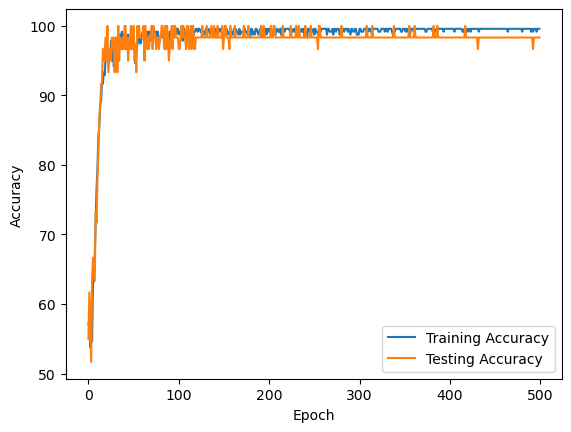

In [41]:
# Training loop
train_accs = []
test_accs = []
for epoch in range(num_epochs):
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    train_loss = train_epoch()
    train_accs.append(train_loss)
    test_accuracy = test()
    test_accs.append(test_accuracy)
    scheduler.step()  # Step the learning rate scheduler

print('Training finished')

# Plot the loss over epochs
plt.plot(train_accs, label='Training Accuracy')
plt.plot(test_accs, label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In my experience(not presented here), I used a three layer network with 100 neurons in each layer and withou dropout. The training accuracy can reach 100% and the testing accuracy is never higher than 96. Though not obvious but may indicate overfitting.



In [42]:
#